In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# x_train (60000,28,28) - Num of images- 60k, height - 28, width-28

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


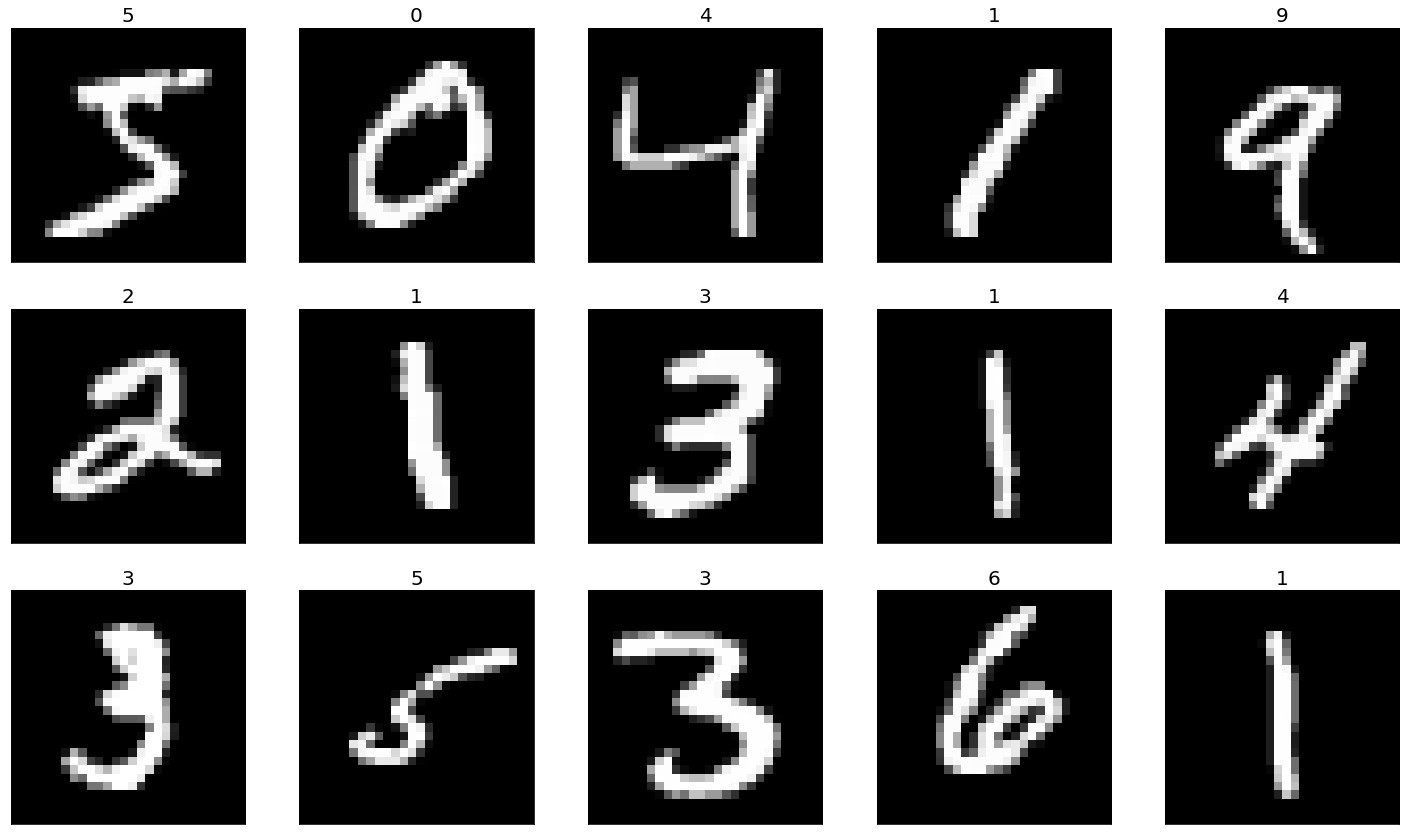

In [6]:
plt.figure(figsize=(25,25))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i],fontsize=20)
plt.show()

In [7]:
print(x_train[0].shape)
print(x_train[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

# Normalize

In [10]:
x_train = x_train/255
x_test = x_test/255

#### Reducing the number of Images 

In [11]:
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:3000,:,:]
y_test = y_test[:3000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28)
(3000, 28, 28)
(10000,)
(3000,)


#### reshaping

In [12]:
x_train  = x_train.reshape(10000,28,28,1)
x_test  = x_test.reshape(3000,28,28,1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(3000, 28, 28, 1)
(10000,)
(3000,)


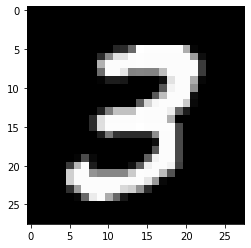

In [15]:
plt.imshow(x_train[7],'gray')

#### Import tensorflow libraries

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [18]:
m1 = Sequential()
m1.add(Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1))) # stride=1

m1.add(MaxPooling2D(pool_size=(2,2))) # stride = 2

m1.add(Conv2D(64, (3,3), activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))  # stride = 2

m1.add(Flatten())
m1.add(Dense(16,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [19]:
m1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [20]:
h1 = m1.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
313/313 [==============================] - 5s 14ms/step - loss: 0.5987 - accuracy: 0.8293 - val_loss: 0.2738 - val_accuracy: 0.9177
Epoch 2/25
313/313 [==============================] - 4s 12ms/step - loss: 0.1582 - accuracy: 0.9538 - val_loss: 0.1480 - val_accuracy: 0.9557
Epoch 3/25
313/313 [==============================] - 4s 12ms/step - loss: 0.1088 - accuracy: 0.9689 - val_loss: 0.1301 - val_accuracy: 0.9583
Epoch 4/25
313/313 [==============================] - 4s 12ms/step - loss: 0.0814 - accuracy: 0.9754 - val_loss: 0.1209 - val_accuracy: 0.9620
Epoch 5/25
313/313 [==============================] - 4s 14ms/step - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.1094 - val_accuracy: 0.9620
Epoch 6/25
313/313 [==============================] - 4s 13ms/step - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.0949 - val_accuracy: 0.9713
Epoch 7/25
313/313 [==============================] - 4s 13ms/step - loss: 0.0416 - accuracy: 0.9870 - val_loss: 0.1139 - val_accuracy: 0.9643

In [21]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
20,0.016157,0.9950,0.143053,0.964000,20
21,0.009798,0.9961,0.129184,0.968000,21
22,0.010765,0.9968,0.101251,0.972000,22
23,0.000810,1.0000,0.099786,0.974333,23
24,0.000272,1.0000,0.104645,0.974000,24


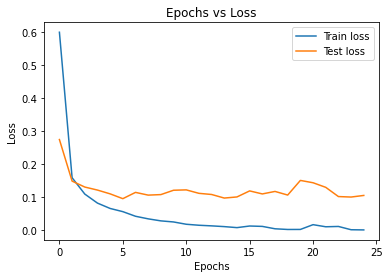

In [22]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

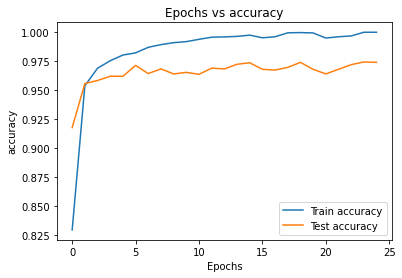

In [23]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Train accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Test accuracy')
plt.title('Epochs vs accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [24]:
res = m1.evaluate(x_test,y_test)
print(res)

94/94 [==============================] - 0s 4ms/step - loss: 0.1046 - accuracy: 0.9740
[0.10464511811733246, 0.9739999771118164]


In [25]:
ypred = m1.predict(x_test)
print(ypred[:5])

94/94 [==============================] - 0s 3ms/step
[[4.2838231e-14 2.6667840e-11 4.1618164e-10 7.1598012e-09 1.6744638e-12
  2.7467773e-17 1.2590047e-27 1.0000000e+00 6.7306356e-15 1.3067845e-13]
 [6.4635036e-10 2.3044509e-08 1.0000000e+00 1.8834564e-14 1.3765474e-18
  2.1200123e-17 5.5947177e-11 7.0913899e-15 1.5385776e-08 4.3213280e-21]
 [4.0932568e-13 1.0000000e+00 2.0515953e-09 1.7711356e-15 2.4047521e-08
  2.6824747e-12 3.6175891e-09 4.2586992e-10 1.9897442e-10 4.4926506e-12]
 [1.0000000e+00 5.1194753e-13 2.1956357e-09 2.5869995e-11 1.1379026e-11
  8.9024725e-11 1.4399364e-08 2.1561754e-10 6.5546249e-11 1.4873652e-09]
 [8.7365981e-18 3.5367401e-17 1.6596189e-15 7.2406051e-17 1.0000000e+00
  3.1779177e-13 2.9535387e-15 1.1839845e-09 6.4225270e-19 3.5334624e-10]]


In [26]:
ypred = m1.predict(x_test)
print(ypred[:5])

94/94 [==============================] - 0s 3ms/step
[[4.2838231e-14 2.6667840e-11 4.1618164e-10 7.1598012e-09 1.6744638e-12
  2.7467773e-17 1.2590047e-27 1.0000000e+00 6.7306356e-15 1.3067845e-13]
 [6.4635036e-10 2.3044509e-08 1.0000000e+00 1.8834564e-14 1.3765474e-18
  2.1200123e-17 5.5947177e-11 7.0913899e-15 1.5385776e-08 4.3213280e-21]
 [4.0932568e-13 1.0000000e+00 2.0515953e-09 1.7711356e-15 2.4047521e-08
  2.6824747e-12 3.6175891e-09 4.2586992e-10 1.9897442e-10 4.4926506e-12]
 [1.0000000e+00 5.1194753e-13 2.1956357e-09 2.5869995e-11 1.1379026e-11
  8.9024725e-11 1.4399364e-08 2.1561754e-10 6.5546249e-11 1.4873652e-09]
 [8.7365981e-18 3.5367401e-17 1.6596189e-15 7.2406051e-17 1.0000000e+00
  3.1779177e-13 2.9535387e-15 1.1839845e-09 6.4225270e-19 3.5334624e-10]]


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
# print(confusion_matrix(y_test,ypred))
# print(classification_report(y_test,ypred))

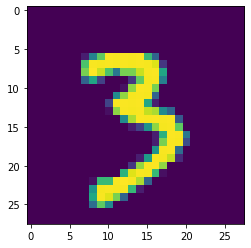

In [32]:
plt.imshow(x_test[30])

In [33]:
print(x_test.shape)
print(x_test[30].shape)
print(x_test[[30]].shape)

(3000, 28, 28, 1)
(28, 28, 1)
(1, 28, 28, 1)


In [34]:
np.argmax(m1.predict(x_test[[30]]))

1/1 [==============================] - 0s 79ms/step


3

In [35]:
def test_img_pred(img_idx):
    test_img = x_test[img_idx].reshape(1,28,28,1)
    pred = m1.predict(test_img)  # 2D numpy array
    res = np.argmax(pred[0])
    
    plt.subplot(1,2,1)
    plt.imshow(x_test[img_idx],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Test Image {img_idx}')
    plt.xlabel(f'Actual Val: {y_test[img_idx]}\nPrediced val {res}')
    
    plt.subplot(1,2,2)
    plt.bar(list(range(10)),pred[0],color='orange')
    plt.xticks(np.arange(10))
    plt.title('Prediction Probability')
    plt.show()

1/1 [==============================] - 0s 47ms/step


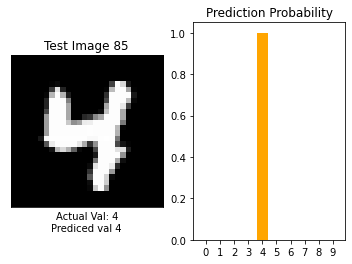

In [38]:
test_img_pred(85)

#### Save the Model

In [40]:
m1.save('hand_written digit_identifications.h1')

INFO:tensorflow:Assets written to: hand_written digit_identifications.h1\assets


INFO:tensorflow:Assets written to: hand_written digit_identifications.h1\assets
